In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)
library(BiocIO)
library(genomation)
library(Rsamtools)
library(parallel)
library(foreach)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    a

In [2]:
obj.seurat.qc2 = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.seurat_pipeline.240617/obj.seurat.qc2.rds")

In [3]:
obj.seurat.qc2@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,⋯,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,RNA_snn_res.0.8,seurat_clusters,beta_12,atac_fragments.log10,gex_umis_count.log10,cell_type
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<chr>
A0011_AAACAGCCACAGCCTG-1,A0011,4418,2185,AAACAGCCACAGCCTG-1,AAACAGCCACAGCCTG-1,ACAGCGGGTATTGAGG-1,1,0,13130,12517,⋯,0.6468294,0.25,3.719069,0.44,29,29,NA,4.306747,3.645226,alpha
A0011_AAACAGCCACTAGGTC-1,A0011,7200,3107,AAACAGCCACTAGGTC-1,AAACAGCCACTAGGTC-1,ACAGCGGGTCCTTTAT-1,1,0,27548,26446,⋯,0.9125754,0.71,4.321469,0.77,9,9,beta_2,4.491782,3.857332,beta
A0011_AAACCAACAAATTGCT-1,A0011,5464,2438,AAACCAACAAATTGCT-1,AAACCAACAAATTGCT-1,CTTTATCGTAAGTACG-1,1,0,19059,18221,⋯,0.8345908,0.59,6.071348,0.99,1,1,beta_1,3.569725,3.737511,beta
A0011_AAACCGAAGCAGGTGG-1,A0011,4954,2004,AAACCGAAGCAGGTGG-1,AAACCGAAGCAGGTGG-1,TGACTATTCGCGACTT-1,1,0,15953,15309,⋯,1.0516399,0.83,4.634839,0.86,1,1,beta_1,4.500003,3.694956,beta
A0011_AAACCGAAGGTCATTA-1,A0011,4428,2013,AAACCGAAGGTCATTA-1,AAACCGAAGGTCATTA-1,TGACTATTCATTGAGA-1,1,0,15684,15037,⋯,0.7811038,0.49,4.590410,0.85,9,9,NA,3.340642,3.646208,beta
A0011_AAACCGAAGTAATCCA-1,A0011,5257,2139,AAACCGAAGTAATCCA-1,AAACCGAAGTAATCCA-1,TGACTATTCAGCTAAA-1,1,0,19561,18657,⋯,0.8721651,0.65,4.699335,0.88,6,6,NA,4.395676,3.720738,acinar
A0011_AAACCGAAGTGAAGTG-1,A0011,3489,1743,AAACCGAAGTGAAGTG-1,AAACCGAAGTGAAGTG-1,TGACTATTCCTGATAT-1,1,0,12537,12040,⋯,0.8277058,0.58,4.984190,0.93,4,4,NA,4.267453,3.542701,alpha
A0011_AAACCGCGTGCTAGAC-1,A0011,3232,1600,AAACCGCGTGCTAGAC-1,AAACCGCGTGCTAGAC-1,AATAGCTCAGTAATCG-1,1,0,10605,10123,⋯,0.8125097,0.55,4.621317,0.86,29,29,NA,4.131137,3.509471,alpha
A0011_AAACGCGCACCTAAGC-1,A0011,8970,3280,AAACGCGCACCTAAGC-1,AAACGCGCACCTAAGC-1,ATAACCCGTATCGCTG-1,1,0,30596,29432,⋯,1.2193119,0.90,3.558604,0.34,24,24,NA,4.869285,3.952792,acinar


In [4]:
names.sample = c("A0011",
                 "C0019",
                 "C0026",
                 "C0024",
                 "C0027",
                 "C0021",
                 "A0028",
                 "A0019",
                 "A0024",
                 "A0029",
                 "C0013",
                 "C0014",
                 "A0030",
                 "A0031",
                 "A0033",
                 "A0021",
                 "A0027",
                 "C0022",
                 "C0023",
                 "C0025")

name.sample2 = c("SAMP_1613",
                 "SAMP_1608",
                 "SAMP_1695",
                 "SAMP_1605",
                 "SAMP_1696",
                 "SAMP_1150",
                 "SAMP_1138",
                 "SAMP_1134",
                 "SAMP_1145",
                 "SAMP_1139",
                 "SAMP_1141",
                 "SAMP_1142",
                 "SAMP_1500",
                 "SAMP_1499",
                 "SAMP_1501",
                 "SAMP_1609",
                 "SAMP_1612",
                 "SAMP_1498",
                 "SAMP_1503",
                 "SAMP_1606")
names(name.sample2) = names.sample
name.sample2

A0011       C0019       C0026       C0024       C0027       C0021 
"SAMP_1613" "SAMP_1608" "SAMP_1695" "SAMP_1605" "SAMP_1696" "SAMP_1150" 
      A0028       A0019       A0024       A0029       C0013       C0014 
"SAMP_1138" "SAMP_1134" "SAMP_1145" "SAMP_1139" "SAMP_1141" "SAMP_1142" 
      A0030       A0031       A0033       A0021       A0027       C0022 
"SAMP_1500" "SAMP_1499" "SAMP_1501" "SAMP_1609" "SAMP_1612" "SAMP_1498" 
      C0023       C0025 
"SAMP_1503" "SAMP_1606"

In [5]:
obj.seurat.qc2@meta.data$sample2 = name.sample2[obj.seurat.qc2@meta.data$orig.ident]
obj.seurat.qc2@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,⋯,nucleosome_percentile,TSS.enrichment,TSS.percentile,RNA_snn_res.0.8,seurat_clusters,beta_12,atac_fragments.log10,gex_umis_count.log10,cell_type,sample2
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<chr>
A0011_AAACAGCCACAGCCTG-1,A0011,4418,2185,AAACAGCCACAGCCTG-1,AAACAGCCACAGCCTG-1,ACAGCGGGTATTGAGG-1,1,0,13130,12517,⋯,0.25,3.719069,0.44,29,29,NA,4.306747,3.645226,alpha,SAMP_1613
A0011_AAACAGCCACTAGGTC-1,A0011,7200,3107,AAACAGCCACTAGGTC-1,AAACAGCCACTAGGTC-1,ACAGCGGGTCCTTTAT-1,1,0,27548,26446,⋯,0.71,4.321469,0.77,9,9,beta_2,4.491782,3.857332,beta,SAMP_1613
A0011_AAACCAACAAATTGCT-1,A0011,5464,2438,AAACCAACAAATTGCT-1,AAACCAACAAATTGCT-1,CTTTATCGTAAGTACG-1,1,0,19059,18221,⋯,0.59,6.071348,0.99,1,1,beta_1,3.569725,3.737511,beta,SAMP_1613
A0011_AAACCGAAGCAGGTGG-1,A0011,4954,2004,AAACCGAAGCAGGTGG-1,AAACCGAAGCAGGTGG-1,TGACTATTCGCGACTT-1,1,0,15953,15309,⋯,0.83,4.634839,0.86,1,1,beta_1,4.500003,3.694956,beta,SAMP_1613
A0011_AAACCGAAGGTCATTA-1,A0011,4428,2013,AAACCGAAGGTCATTA-1,AAACCGAAGGTCATTA-1,TGACTATTCATTGAGA-1,1,0,15684,15037,⋯,0.49,4.590410,0.85,9,9,NA,3.340642,3.646208,beta,SAMP_1613
A0011_AAACCGAAGTAATCCA-1,A0011,5257,2139,AAACCGAAGTAATCCA-1,AAACCGAAGTAATCCA-1,TGACTATTCAGCTAAA-1,1,0,19561,18657,⋯,0.65,4.699335,0.88,6,6,NA,4.395676,3.720738,acinar,SAMP_1613
A0011_AAACCGAAGTGAAGTG-1,A0011,3489,1743,AAACCGAAGTGAAGTG-1,AAACCGAAGTGAAGTG-1,TGACTATTCCTGATAT-1,1,0,12537,12040,⋯,0.58,4.984190,0.93,4,4,NA,4.267453,3.542701,alpha,SAMP_1613
A0011_AAACCGCGTGCTAGAC-1,A0011,3232,1600,AAACCGCGTGCTAGAC-1,AAACCGCGTGCTAGAC-1,AATAGCTCAGTAATCG-1,1,0,10605,10123,⋯,0.55,4.621317,0.86,29,29,NA,4.131137,3.509471,alpha,SAMP_1613
A0011_AAACGCGCACCTAAGC-1,A0011,8970,3280,AAACGCGCACCTAAGC-1,AAACGCGCACCTAAGC-1,ATAACCCGTATCGCTG-1,1,0,30596,29432,⋯,0.90,3.558604,0.34,24,24,NA,4.869285,3.952792,acinar,SAMP_1613


In [7]:
out_dir = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/Islets/1.prepare_data/1.1.split_barcode/split_barcode/"

In [9]:
dir.create(out_dir,
           recursive = T)

In [10]:
unique(obj.seurat.qc2$cell_type)

[1] "alpha"       "beta"        "acinar"      "mesenchymal" "duct"       
[6] "delta"       "PP"          "immune"      "endothelial"

In [15]:
for (cell.type.tmp in unique(obj.seurat.qc2$cell_type)){
    meta.data.tmp = obj.seurat.qc2@meta.data[obj.seurat.qc2$cell_type == cell.type.tmp,]
    for (sample.tmp in unique(meta.data.tmp$sample2)){
        write.table(meta.data.tmp[meta.data.tmp$sample2 == sample.tmp,"barcode"],
                  paste(out_dir,
                        cell.type.tmp,
                        ".",
                        sample.tmp,
                        ".tsv",
                        sep = ""),
                   col.names = F,
                   row.names = F,
                   quote = F)
    }
    
}

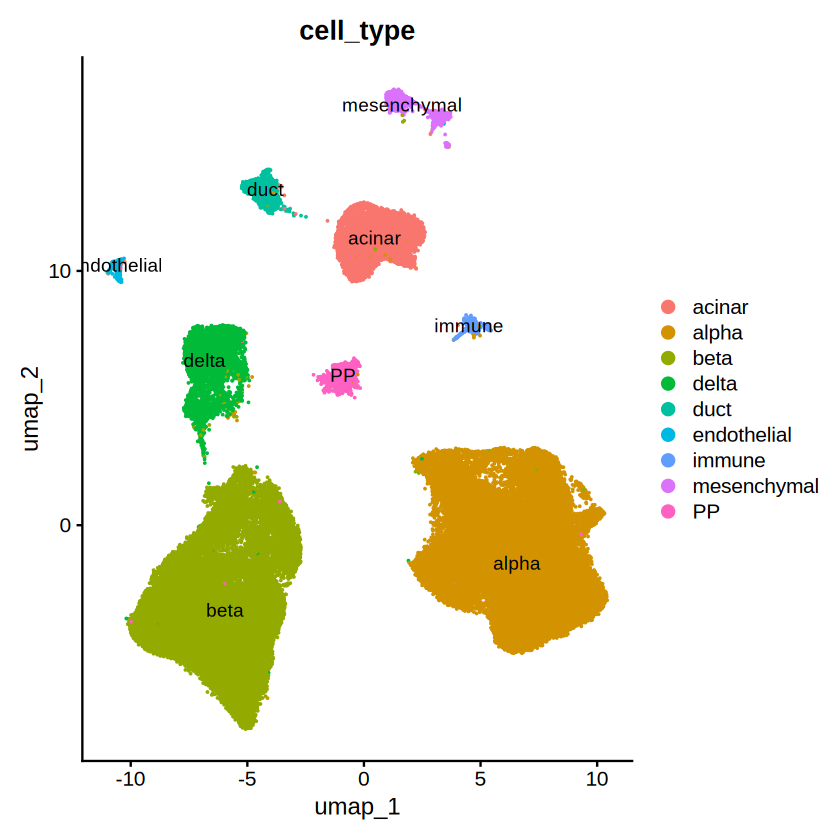

In [21]:
DimPlot(obj.seurat.qc2, reduction = "umap",group.by = "cell_type",label = TRUE)

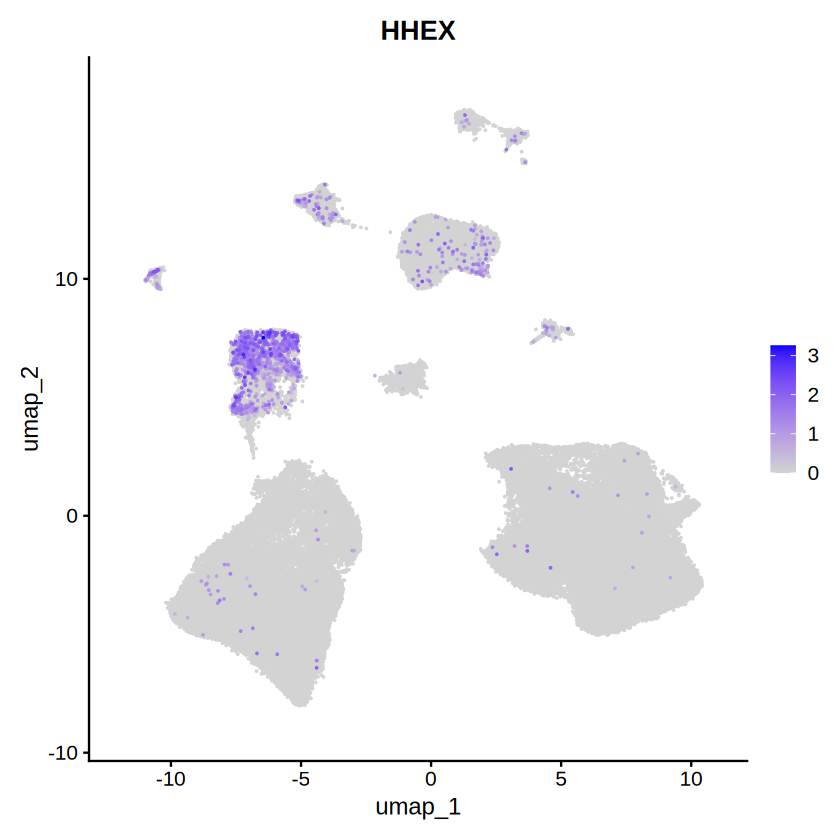

In [22]:
FeaturePlot(obj.seurat.qc2, features = c("HHEX"),order = T)

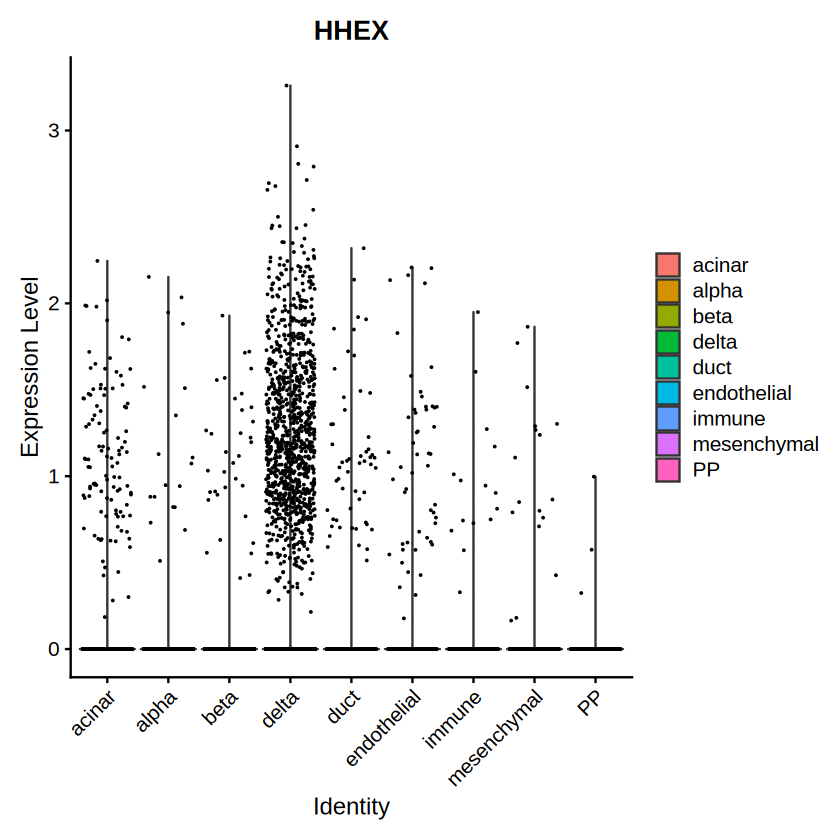

In [19]:
VlnPlot(obj.seurat.qc2, features = c("HHEX"),group.by = "cell_type")

In [16]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] foreach_1.5.2        Rsamtools_2.18.0     Biostrings_2.70.1   
 [4] XVector_0.42.0       GenomicRanges_1.54.1 GenomeI